In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [2]:
#계층적 군집화
iris = load_iris()
#print(iris)
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head(5))

from scipy.spatial.distance import pdist, squareform
distmatrix = pdist(iris_df.loc[0:4, ["sepal length (cm)", "sepal width (cm)"]], 
                   metric = "euclidean")
print("distmatrix: ", distmatrix)

row_dist = pd.DataFrame(squareform(distmatrix))
print("row_dist: ", row_dist)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
distmatrix:  [0.53851648 0.5        0.64031242 0.14142136 0.28284271 0.31622777
 0.60827625 0.14142136 0.5        0.64031242]
row_dist:            0         1         2         3         4
0  0.000000  0.538516  0.500000  0.640312  0.141421
1  0.538516  0.000000  0.282843  0.316228  0.608276
2  0.500000  0.282843  0.000000  0.141421  0.500000
3  0.640312  0.316228  0.141421  0.000000  0.640312
4  0.141421  0.608276  0.500000  0.640312  0.000000


r_cluster:  [[0.         4.         0.14142136 2.        ]
 [2.         3.         0.14142136 2.        ]
 [1.         6.         0.28284271 3.        ]
 [5.         7.         0.5        5.        ]]
   id_1  id_2        거리  멤버 수
0   0.0   4.0  0.141421   2.0
1   2.0   3.0  0.141421   2.0
2   1.0   6.0  0.282843   3.0
3   5.0   7.0  0.500000   5.0


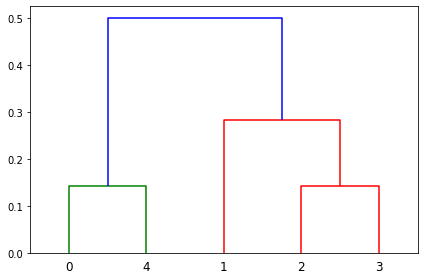

In [3]:
#단일연결법
r_cluster = linkage(distmatrix, method = "single")
print("r_cluster: ", r_cluster)
df = pd.DataFrame(r_cluster, columns = ["id_1", "id_2", "거리", "멤버 수"])
print(df)

row_dend = dendrogram(r_cluster)
plt.tight_layout()
plt.show()

r_cluster:  [[0.         4.         0.14142136 2.        ]
 [2.         3.         0.14142136 2.        ]
 [1.         6.         0.31622777 3.        ]
 [5.         7.         0.64031242 5.        ]]
   id_1  id_2        거리  멤버 수
0   0.0   4.0  0.141421   2.0
1   2.0   3.0  0.141421   2.0
2   1.0   6.0  0.316228   3.0
3   5.0   7.0  0.640312   5.0


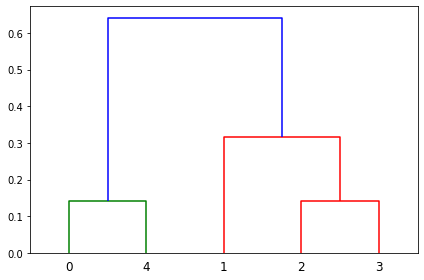

In [4]:
#완전연결법
r_cluster = linkage(distmatrix, method = "complete")
print("r_cluster: ", r_cluster)
df = pd.DataFrame(r_cluster, columns = ["id_1", "id_2", "거리", "멤버 수"])
print(df)

row_dend = dendrogram(r_cluster)
plt.tight_layout()
plt.show()

r_cluster:  [[0.         4.         0.14142136 2.        ]
 [2.         3.         0.14142136 2.        ]
 [1.         6.         0.29953524 3.        ]
 [5.         7.         0.57123626 5.        ]]
   id_1  id_2        거리  멤버 수
0   0.0   4.0  0.141421   2.0
1   2.0   3.0  0.141421   2.0
2   1.0   6.0  0.299535   3.0
3   5.0   7.0  0.571236   5.0


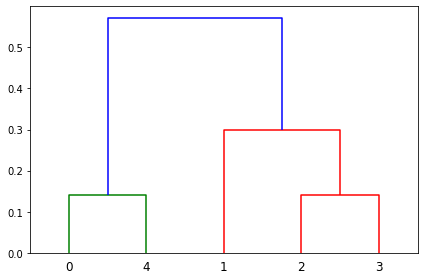

In [5]:
#평균연결법
r_cluster = linkage(distmatrix, method = "average")
print("r_cluster: ", r_cluster)
df = pd.DataFrame(r_cluster, columns = ["id_1", "id_2", "거리", "멤버 수"])
print(df)

row_dend = dendrogram(r_cluster)
plt.tight_layout()
plt.show()

<function make_blobs at 0x00000218A2D66F28>
x.shape:  (150, 2) , y.shape:  (150,)


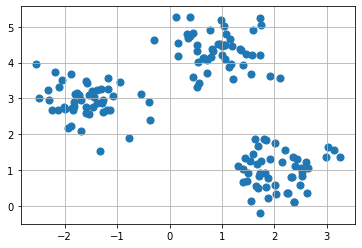

In [6]:
#비계층적 군집화
#초기 Data 시각화
print(make_blobs)
x, y = make_blobs(n_samples = 150, n_features = 2, centers = 3,
                  cluster_std = 0.5, shuffle = True, random_state = 0)
print("x.shape: ", x.shape, ", y.shape: ", y.shape)

plt.scatter(x[:, 0], x[:,1], marker = "o", s = 50)
plt.grid()
plt.show()

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)
pred:  [1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


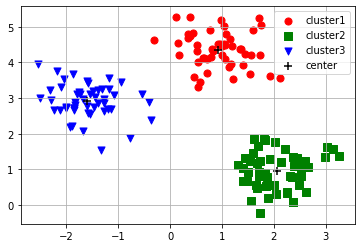

In [7]:
#Kmeans Clustering
init_centroid = "random" # 초기 클러스터 중심을 임의적
#init_centroid = "k-means++" # 기본값

kmodel = KMeans(n_clusters = 3, init = init_centroid, random_state = 0)
print(kmodel)
pred = kmodel.fit_predict(x)
print("pred: ", pred)
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], marker = "o", s = 50, c = "red", label = "cluster1")
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], marker = "s", s = 50, c = "green", label = "cluster2")
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], marker = "v", s = 50, c = "blue", label = "cluster3")

plt.scatter(kmodel.cluster_centers_[:,0], kmodel.cluster_centers_[:,1],
            marker = "+", s = 80, c = "black", label = "center")
plt.legend()
plt.grid()
plt.show()

62.84061768542222


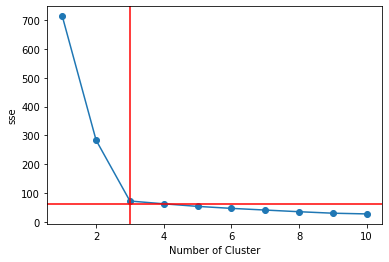

In [8]:
#n-clusters를 알기위한 방법
#1 엘보우 기법: 클러스터 내 오차제곱합이 최소가 되도록 클러스터의 중심을 결정해 나가는 방법
def elbow(x):
    sse = [] #오차제곱합이 최소가 되도록 클러스터의 중심을 결정
    for i in range(1, 11):
        km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
        km.fit(x)
        sse.append(km.inertia_)
    print(sse[3])
    plt.plot(range(1, 11), sse, marker = "o")
    plt.axvline(x=3,color='r')
    plt.axhline(y=sse[3],color='r')
    plt.xlabel("Number of Cluster")
    plt.ylabel("sse")
    plt.show()
    
elbow(x)

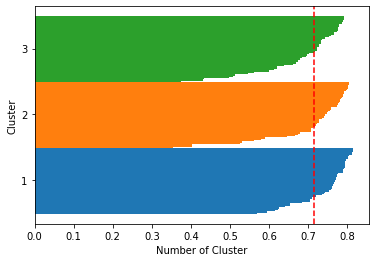

In [9]:
#2. 실루엣 기법: 클러스터링의 품질을 정량적으로 계산해 주는 방법
def plotSilhouette(x, pred):
    cluster_labels = np.unique(pred)
    n_clusters = cluster_labels.shape[0]   # 클러스터 개수를 n_clusters에 저장
    sil_val = silhouette_samples(x, pred, metric='euclidean')  # 실루엣 계수를 계산
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # 각 클러스터에 속하는 데이터들에 대한 실루엣 값을 수평 막대 그래프로 그려주기
        c_sil_value = sil_val[pred == c]
        c_sil_value.sort()
        y_ax_upper += len(c_sil_value)

        plt.barh(range(y_ax_lower, y_ax_upper), c_sil_value, height=1.0, edgecolor='none')
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_sil_value)

    sil_avg = np.mean(sil_val)         # 평균 저장
    plt.axvline(sil_avg, color='red', linestyle='--')  # 계산된 실루엣 계수의 평균값을 빨간 점선으로 표시
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Number of Cluster')
    plt.show() 

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
km = KMeans(n_clusters=3, random_state=0) 
y_km = km.fit_predict(X)

plotSilhouette(X, y_km)